In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import matplotlib

In [7]:
bimodalgenes=pd.read_csv('bimodal genes/3_countries_combined_BiDgenes(41)',index_col=0,sep='\t').index.tolist()
bimodalgenes.sort()
country_names=['American','Spanish','Danish','3_countries_combined']
countries_combined_BiDgenes=pd.read_csv('bimodal genes/3_countries_combined_BiDgenes',index_col=0,sep='\t').index.tolist()

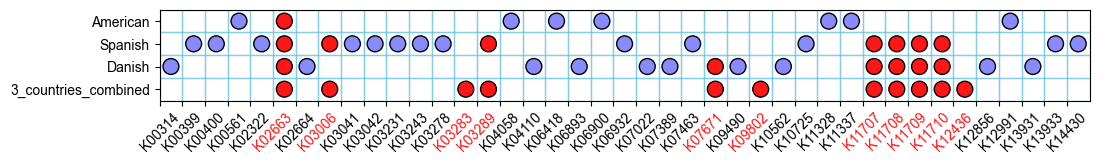

In [ ]:
def draw_grid_with_circles(rows, cols, circle_positions,countries_combined_position):
    fig, ax = plt.subplots(figsize=(12,3))
    ax.set_aspect('equal')
    
    # Draw the grid
    for i in range(rows):
        for j in range(cols):
            square = patches.Rectangle((j, i), 1, 1, edgecolor='#5CBEE3', alpha=0.5,facecolor='none')
            ax.add_patch(square)
    
    # Draw circles at specified positions
    for pos in circle_positions:
        x, y = pos
        if x in countries_combined_position:
            circle = patches.Circle((x + 0.5, y + 0.5), 0.35, edgecolor='black', facecolor='#FF1616', alpha=1)
            ax.add_patch(circle)
        else:    
            circle = patches.Circle((x + 0.5, y + 0.5), 0.35, edgecolor='black', facecolor='#8A8AFF', alpha=1)
            ax.add_patch(circle)
        
    # Set the coordinate range and grid style
    plt.xlim(0, cols)
    plt.ylim(0, rows)
    ax.set_xticks(ticks=np.arange(0, cols, 1),labels=bimodalgenes, rotation=45,family='Arial')
    ax.set_yticks(ticks=np.arange(0.5, rows, 1),labels=country_names,family='Arial')
    for L in countries_combined_position:
        ax.get_xticklabels()[L].set_color("#FF1616")
    ax.grid(False)
    plt.gca().invert_yaxis()  # Invert the y-axis so that it is arranged from top to bottom
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.show()
    fig.savefig('fig/'+'41 bimodal genes distributions in diffrent contries.pdf')

circle_positions=[]
for k in range(len(country_names)):
    genes=pd.read_csv('bimodal genes/'+country_names[k]+'_BiDgenes',index_col=0,sep='\t').index.tolist()
    index_cols=[bimodalgenes.index(item) if item in bimodalgenes else None for item in genes]
    circle_positions_1=list(zip(index_cols,[k]*len(index_cols)))
    circle_positions.extend(circle_positions_1)
countries_combined_position=[bimodalgenes.index(gene) for gene in countries_combined_BiDgenes]
draw_grid_with_circles(len(country_names), len(bimodalgenes) ,circle_positions,countries_combined_position)
